In [1]:
import sys
# sys.path.append("..")

In [2]:
from math import nan
from pathlib import Path
from analysis.wandb_utils import Metrics, load_data, plot, simple_concat, Aggregation
from analysis.wandb_downloader import RunsDownloader
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Path(".").resolve()

PosixPath('/Users/mb715/Code/fair-dist-matching/analysis/neurips21/celeba')

In [4]:
results_dir = Path("../../../results/celeba/no_smiling_females/")

# Still need to run ERM for the other missing quadrants
# data = load_data(
# #     results_dir / "ours_no_balancing.csv",
# #     results_dir / "ours_perfect_balancing.csv",
#     results_dir / "celeba_baseline_cnn_Male_Smiling_40epochs.csv",
# #     results_dir /
# )
data = pd.DataFrame()

In [5]:
wandb = RunsDownloader(project="suds")
# data_ = wandb.groups(
#     "celeba.SupportMatching.balanced-with-clustering.new_ae_arch_more_iters_hierarchical_clustering.no_smiling_females",
#     "celeba.SupportMatching.balanced-True.new_ae_arch_more_iters.no_smiling_females",
#     "celeba.SupportMatching.balanced-False.new_ae_arch_more_iters.no_smiling_females",
# )

# Sequence of presentation of the methods: Our method (no balancing), Our method (clustering), gDRO (clustering) aka GEORGE, ERM, Our method (Batch Oracle), gDRO (Oracle).

# Our Method (No Balancing)
data_ =  wandb.groups("celeba.SupportMatching.balanced-False.new_ae_arch_more_iters.no_smiling_males")
data = simple_concat(data, data_)

# Our Method (Clustering)
data_ =  wandb.groups("celeba.SupportMatching.balanced-with-clustering.new_ae_arch_more_iters_hierarchical_clustering.no_smiling_males")
data = simple_concat(data, data_)

# GEORGE
data_ =  wandb.groups("celeba.gdro.context_mode_cluster_labels.cluster_and_gdro.real_gdro.no_smiling_males")
data = simple_concat(data, data_)

# gDRO trained only on the training data
data = simple_concat(data, data_)
data_ =  wandb.groups("celeba.gdro.context_mode=ContextMode.unlabelled..gdro_tests.no_smiling_males")
data_["misc.log_method"] = "gDRO"
data = simple_concat(data, data_)

# ERM
data_ =  wandb.groups("celeba.erm.context_mode_unlabelled.erm_no_context_no_reg.no_smiling_males")
data = simple_concat(data, data_)


# ----------------
# Our Method (Bag Oracle)
data_ =  wandb.groups("celeba.SupportMatching.balanced-True.new_ae_arch_more_iters.no_smiling_males")
data = simple_concat(data, data_)

# gDRO(Label Oracle)
data_ =  wandb.groups("celeba.gdro.context_mode_ground_truth.oracle_gdro.celeba_gdro.no_smiling_males")
data = simple_concat(data, data_)



'celeba.SupportMatching.balanced-False.new_ae_arch_more_iters.no_smiling_males': found 5 runs.
'celeba.SupportMatching.balanced-with-clustering.new_ae_arch_more_iters_hierarchical_clustering.no_smiling_males': found 5 runs.
'celeba.gdro.context_mode_cluster_labels.cluster_and_gdro.real_gdro.no_smiling_males': found 5 runs.
'celeba.gdro.context_mode=ContextMode.unlabelled..gdro_tests.no_smiling_males': found 5 runs.
'celeba.erm.context_mode_unlabelled.erm_no_context_no_reg.no_smiling_males': found 5 runs.
'celeba.SupportMatching.balanced-True.new_ae_arch_more_iters.no_smiling_males': found 5 runs.
'celeba.gdro.context_mode_ground_truth.oracle_gdro.celeba_gdro.no_smiling_males': found 5 runs.


In [6]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 2),
    file_prefix="celeba_gender_smiling",
    sens_attr="Male",
)
plot_title = "Missing source: smiling males"
output_dir = "no_smiling_males"

Text(0.5, 1.0, 'Missing source: smiling males')

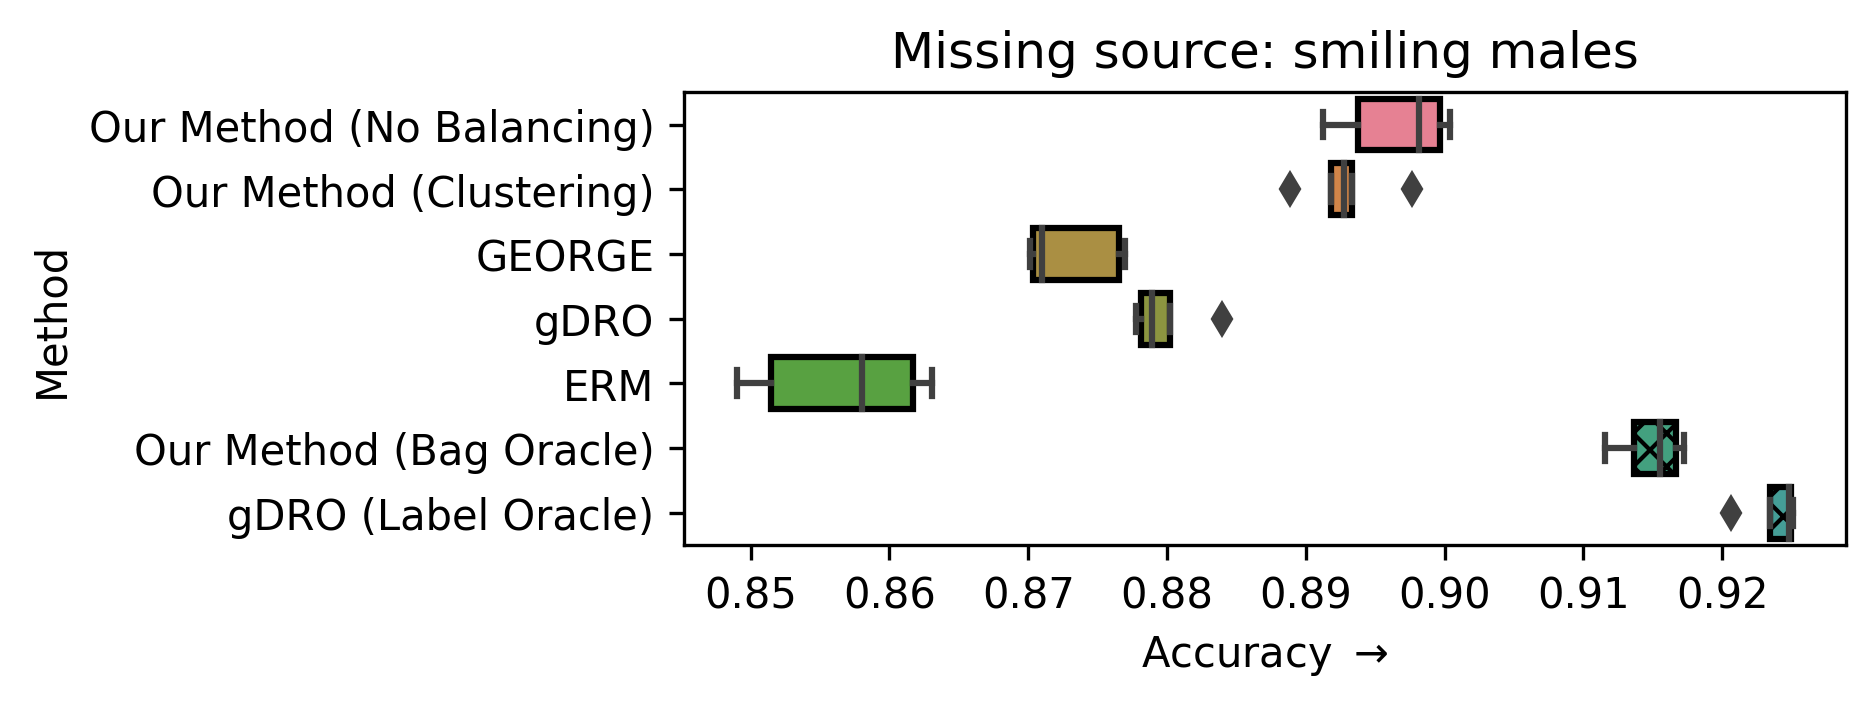

In [7]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, nan), **plot_kwargs, output_dir=output_dir)
plt.title(plot_title)

Text(0.5, 1.0, 'Missing source: smiling males')

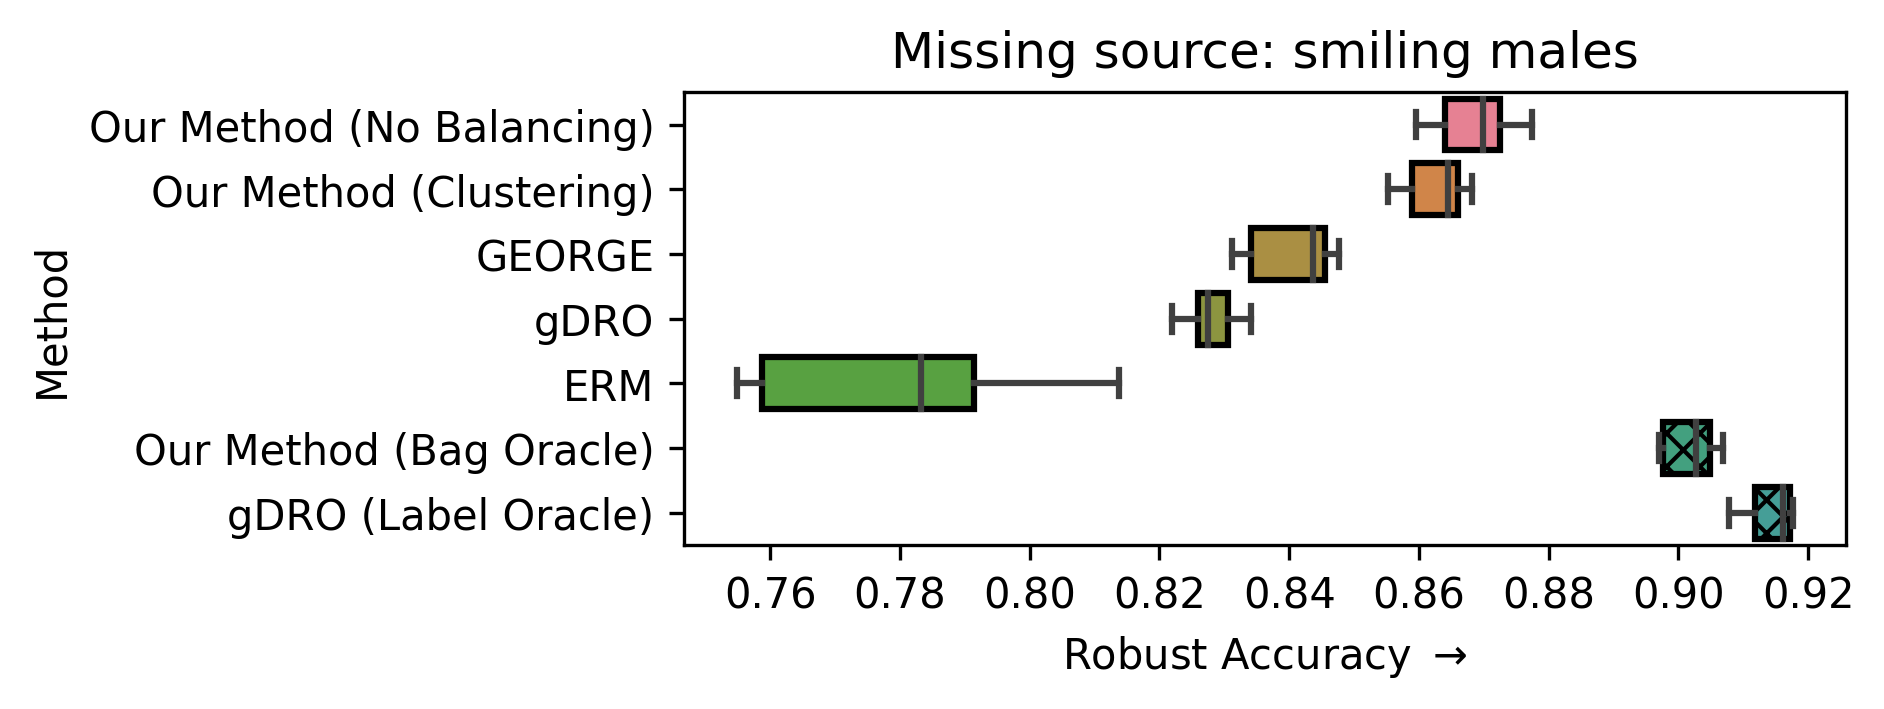

In [8]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, nan), **plot_kwargs, agg=Aggregation.min, output_dir=output_dir)
plt.xlabel("Robust Accuracy $\\rightarrow$")
plt.title(plot_title)

Text(0.5, 1.0, 'Missing source: smiling males')

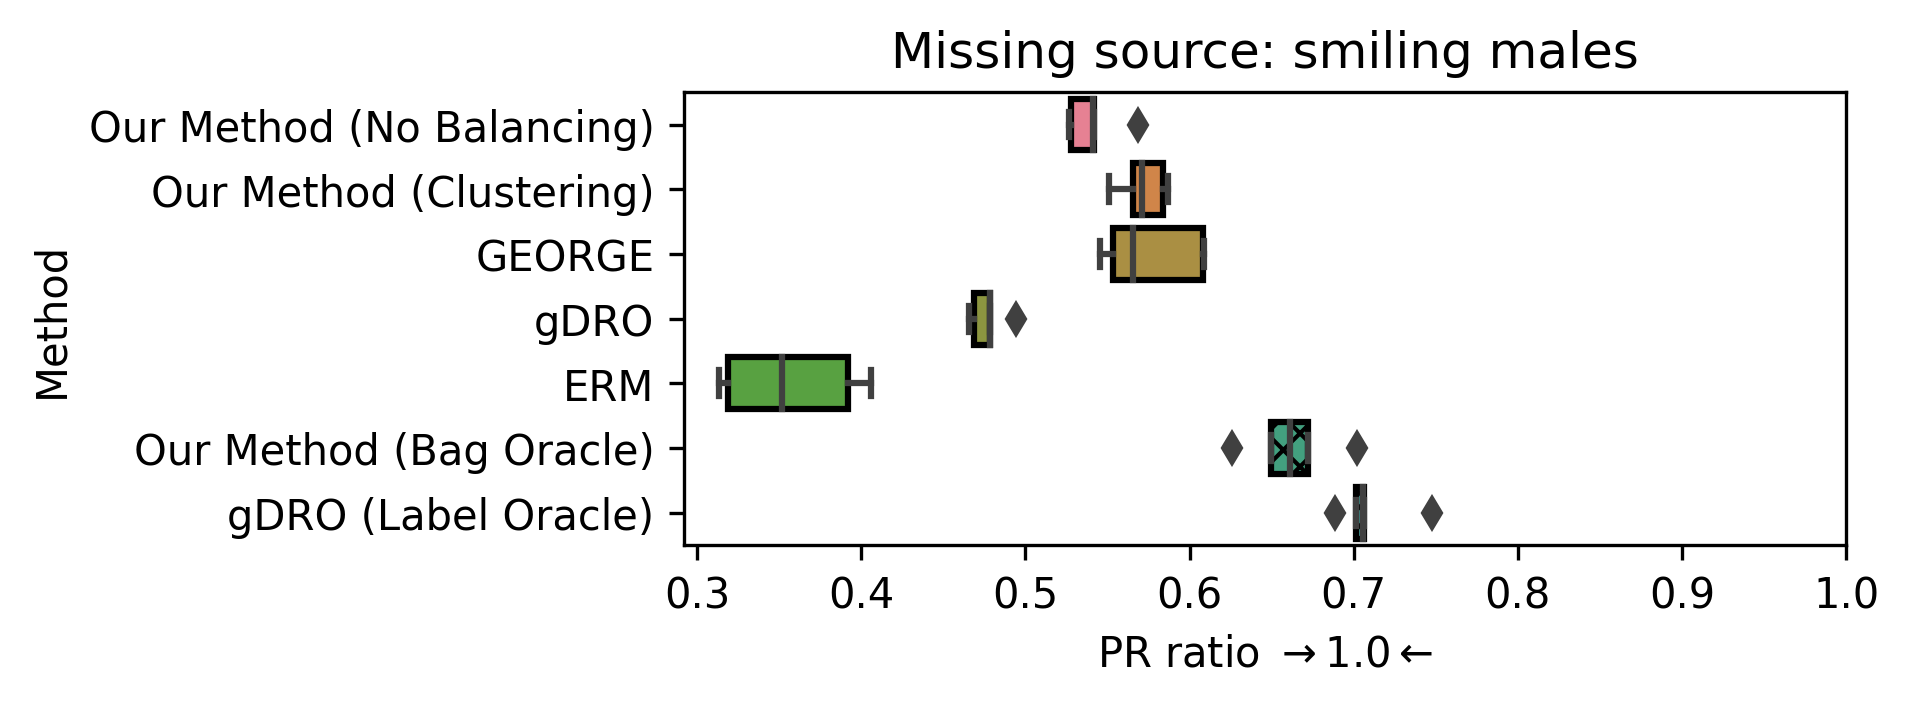

In [9]:
plot(data, metrics=[Metrics.prr], x_limits=(nan, 1), **plot_kwargs, fillna=True, output_dir=output_dir)
plt.title(plot_title)

Text(0.5, 1.0, 'Missing source: smiling males')

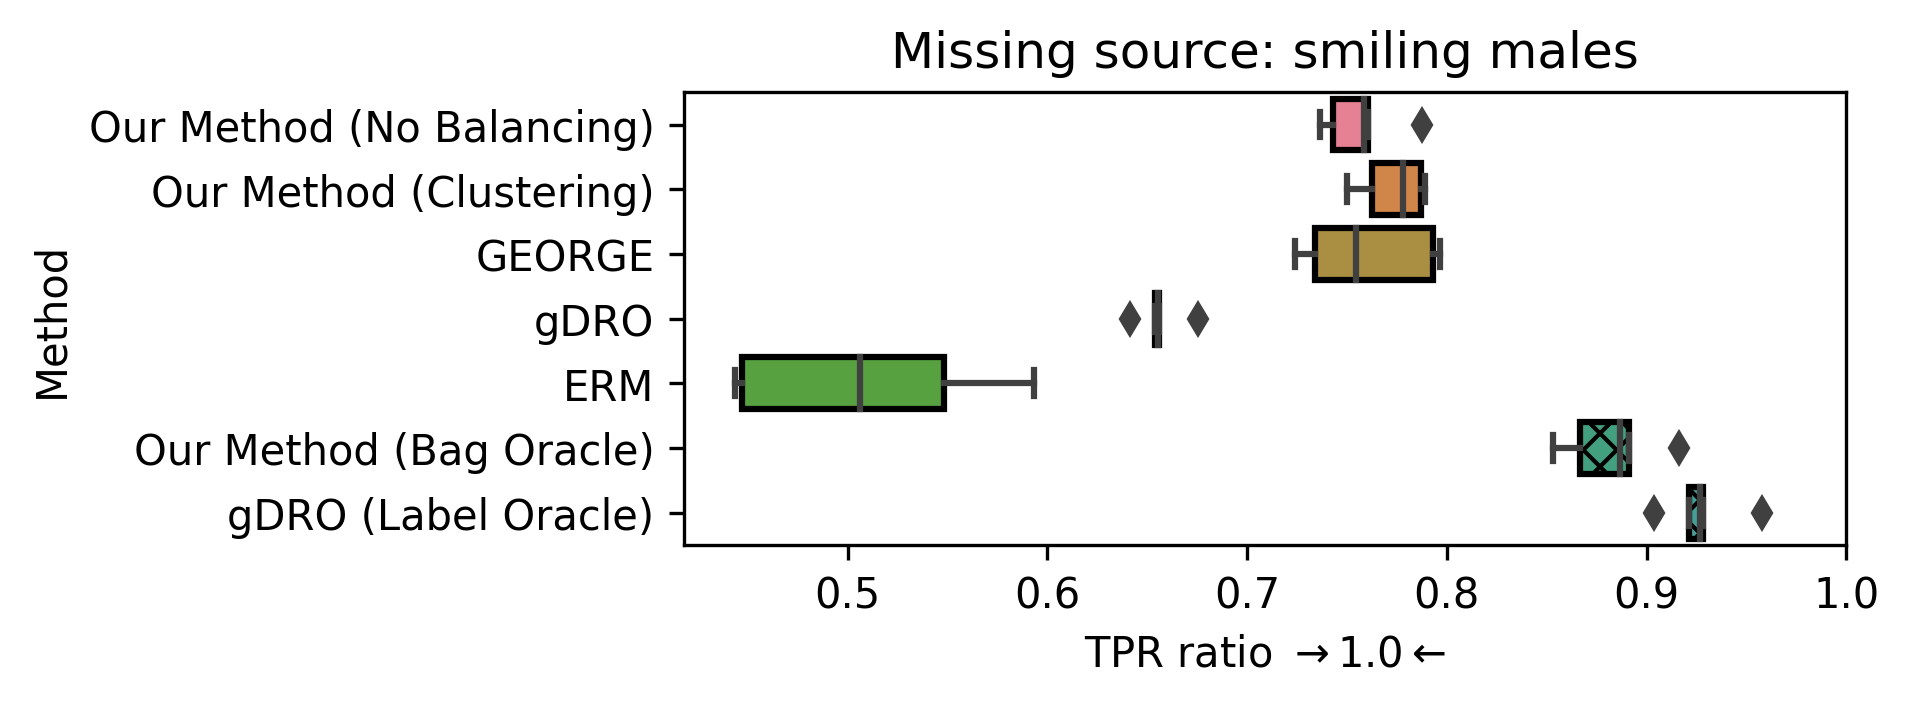

In [10]:
plot(data, metrics=[Metrics.tprr], x_limits=(nan, 1), **plot_kwargs, fillna=True, output_dir=output_dir)
plt.title(plot_title)

Text(0.5, 1.0, 'Missing source: smiling males')

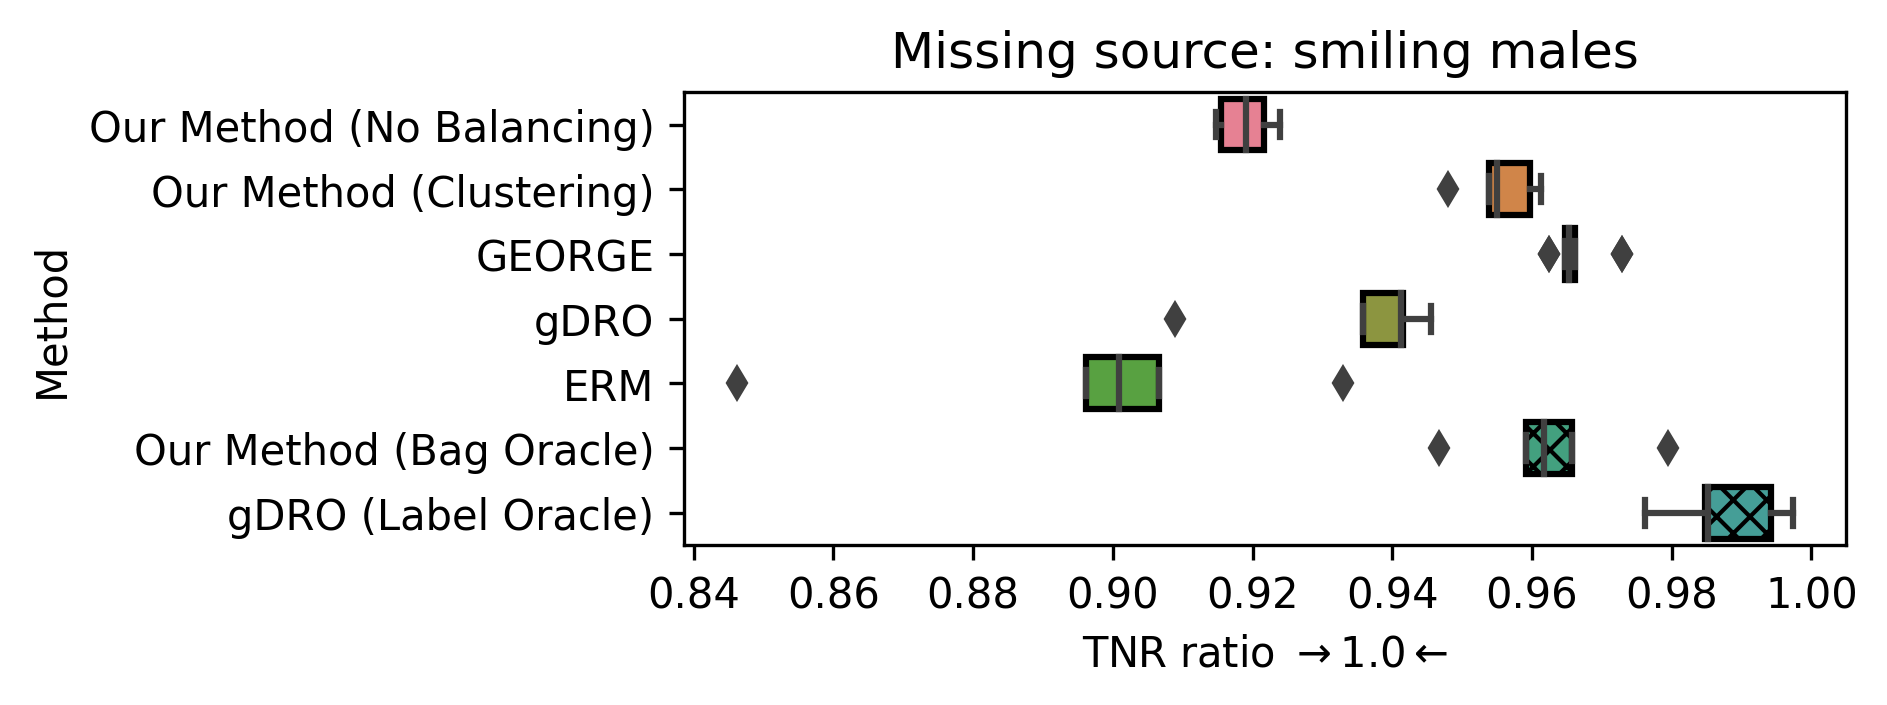

In [11]:
plot(data, metrics=[Metrics.tnrr], x_limits=(nan, nan), **plot_kwargs, fillna=True, output_dir=output_dir)
plt.title(plot_title)